In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-dark')

In [39]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')
matches.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
deliveries.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)

deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [40]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Q1

In [41]:
rcb_srh=matches[((matches.team1=='Royal Challengers Bangalore') | (matches.team2=='Royal Challengers Bangalore')) & ((matches.team1=='Sunrisers Hyderabad') | (matches.team2=='Sunrisers Hyderabad'))].copy()
rcb=matches[(matches.team1=='Royal Challengers Bangalore') | (matches.team2=='Royal Challengers Bangalore')].copy()
srh=matches[(matches.team1=='Sunrisers Hyderabad') | (matches.team2=='Sunrisers Hyderabad')].copy()
rcb_srh.shape,rcb.shape,srh.shape

((25, 18), (180, 18), (183, 18))

In [42]:
rcb_srhdeli=deliveries[((deliveries.batting_team=='Royal Challengers Bangalore') | (deliveries.bowling_team=='Royal Challengers Bangalore')) & ((deliveries.batting_team=='Sunrisers Hyderabad') | (deliveries.bowling_team=='Sunrisers Hyderabad'))].copy()
rcbdeli=deliveries[(deliveries.batting_team=='Royal Challengers Bangalore') | (deliveries.bowling_team=='Royal Challengers Bangalore')].copy()
srhdeli=deliveries[(deliveries.batting_team=='Sunrisers Hyderabad') | (deliveries.bowling_team=='Sunrisers Hyderabad')].copy()
rcb_srhdeli.shape,rcbdeli.shape,srhdeli.shape

((5971, 21), (42144, 21), (43760, 21))

In [43]:
rcb_srh.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
79,80,2008,Hyderabad,2008-05-25,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Royal Challengers Bangalore,0,5,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,RE Koertzen,NaN
110,111,2008,Bangalore,2008-05-03,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Royal Challengers Bangalore,3,0,P Kumar,M Chinnaswamy Stadium,BR Doctrove,SL Shastri,NaN
123,124,2009,Cape Town,2009-04-22,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,24,0,AC Gilchrist,Newlands,M Erasmus,AM Saheba,NaN
170,171,2009,Centurion,2009-05-21,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,12,0,MK Pandey,SuperSport Park,IL Howell,S Ravi,NaN


In [44]:
rcb.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
16,17,2017,Bangalore,2017-04-16,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin,NaN


In [45]:
srh.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
18,19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,NaN


In [46]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(ncols=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],colors=['aliceblue','bisque'],autopct='%2.f%%')
        ax[i].set_title(columns[i])

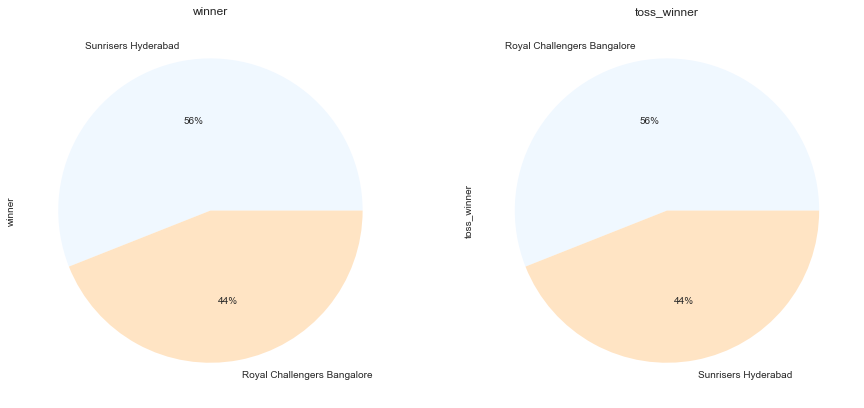

In [47]:
cat_plot(rcb_srh,['winner','toss_winner'],(15,8),'pie')

In [48]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color='cadetblue')
        ax[i].set_title(columns[i])

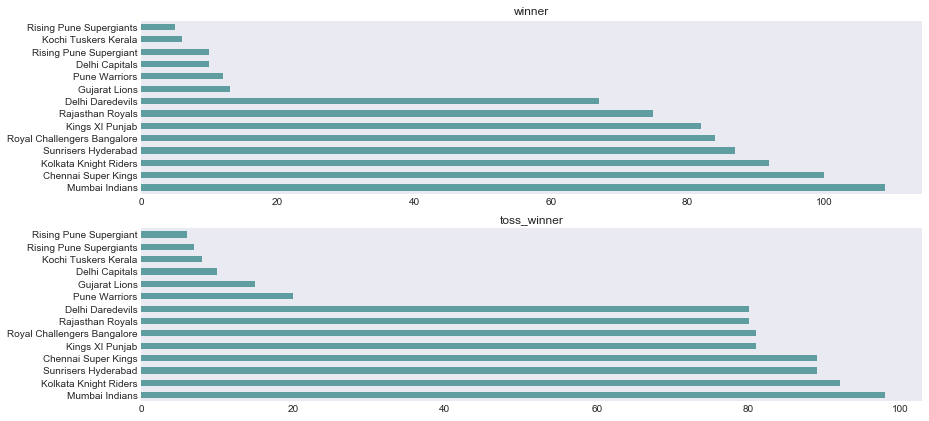

In [49]:
cat_plot(matches,['winner','toss_winner'],(14,7),'barh')


### The conclusion we can infer from the above findings is that SRH is the winner if we consider overall data but when it comes to head on data the answer becomes quite awkward but we will go SRH as it is a better team in overall data.

# Q2
- Economy Rate

In [66]:
sharma=deliveries[(deliveries.bowler.str.contains('S Sharma'))].groupby('match_id').agg({'batsman_runs':'sum',
                                                                                         'bye_runs':'sum',
                                                                                         'legbye_runs':'sum',
                                                                                         'ball':'count'})

sharma

,batsman_runs,bye_runs,legbye_runs,ball
match_id,,,,
11138,42,0,0,26
11144,38,0,0,24
11147,19,0,0,23
11152,25,0,0,24
11310,20,0,0,19
11313,21,0,0,24
11321,32,0,2,25
11324,33,0,0,26
11329,37,0,0,24


In [68]:
sharma['eco_rate']=((sharma.batsman_runs-(sharma.bye_runs+sharma.legbye_runs))/sharma.ball)*6

In [69]:
sharma.eco_rate.describe()

count    11.000000
mean      7.922308
std       2.460085
min       4.956522
25%       6.282895
50%       7.615385
75%       9.375000
max      13.500000
Name: eco_rate, dtype: float64

Text(0.5, 1.0, "Distribution of S Sharma's economy rate")

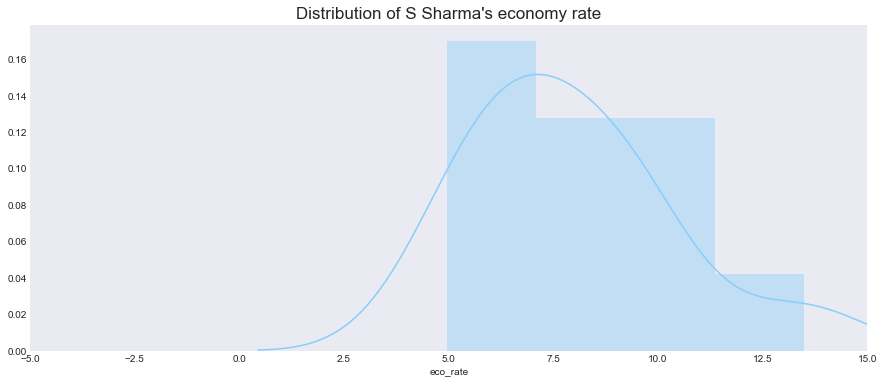

In [71]:
plt.figure(figsize=(15,6))
sns.distplot(sharma.eco_rate,color='lightskyblue')
plt.xlim([-5,15])
plt.title('Distribution of S Sharma\'s economy rate',fontsize=17)

### As we can see above his economy rate is likely to be greater than or equal to 7.5

# Q2
- Boundaries

In [78]:
sharma_boundaries=deliveries.query('batsman_runs>=4')
sharma_boundaries=sharma_boundaries[(sharma_boundaries.bowler.str.contains('S Sharma'))].groupby('match_id').batsman_runs.count()
sharma_boundaries

match_id
11138    6
11144    3
11147    2
11152    3
11310    2
11313    1
11321    4
11324    3
11329    4
11332    9
11339    4
Name: batsman_runs, dtype: int64

In [79]:
sharma_boundaries.describe()

count    11.000000
mean      3.727273
std       2.195036
min       1.000000
25%       2.500000
50%       3.000000
75%       4.000000
max       9.000000
Name: batsman_runs, dtype: float64

Text(0.5, 1.0, 'sharma Boundary hit Frequency Distribution')

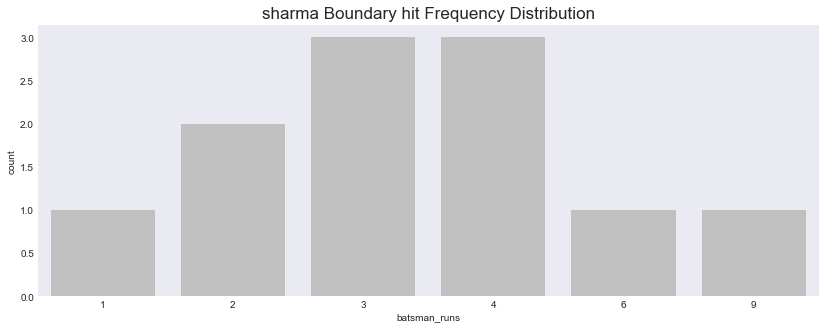

In [81]:
plt.figure(figsize=(14,5))
sns.countplot(sharma_boundaries,color='silver')
plt.title('sharma Boundary hit Frequency Distribution',fontsize=17)

### From the above observation we can assume that he will let greater than 4 boundaries hit in the match from his bowling

# Q3


In [50]:
boundaries=rcb_srhdeli.query('batsman_runs>=4').groupby(['match_id','batsman']).batsman_runs.count()
boundaries

match_id  batsman    
1         A Choudhary     1
          BCJ Cutting     2
          CH Gayle        5
          DA Warner       3
          DJ Hooda        1
                         ..
11345     S Hetmyer      10
          UT Yadav        2
          V Kohli         3
          V Shankar       3
          WP Saha         4
Name: batsman_runs, Length: 257, dtype: int64

In [51]:
strike_rate=rcb_srhdeli.groupby(['match_id',
                                'batsman',],
                               as_index=False).agg({'ball':'count',
                                                    'batsman_runs':'sum'})
strike_rate=strike_rate.query('ball>10')
strike_rate

,match_id,batsman,ball,batsman_runs
2,1,CH Gayle,23,32
4,1,DJ Hooda,12,16
5,1,KM Jadhav,18,31
6,1,MC Henriques,37,52
7,1,Mandeep Singh,16,24
...,...,...,...,...
370,11345,MJ Guptill,23,30
371,11345,MK Pandey,12,9
375,11345,S Hetmyer,50,78
378,11345,V Shankar,18,27


In [52]:
strike_rate=strike_rate.merge(boundaries,on=['match_id',
                                             'batsman'])

strike_rate.rename({'batsman_runs_y':'boundaries_count'}, 
                   inplace=True,axis=1)
strike_rate.rename({'batsman_runs_x':'batsman_runs'},
                   inplace=True,axis=1)

In [53]:
strike_rate

,match_id,batsman,ball,batsman_runs,boundaries_count
0,1,CH Gayle,23,32,5
1,1,DJ Hooda,12,16,1
2,1,KM Jadhav,18,31,5
3,1,MC Henriques,37,52,5
4,1,Mandeep Singh,16,24,5
...,...,...,...,...,...
167,11345,MJ Guptill,23,30,5
168,11345,MK Pandey,12,9,1
169,11345,S Hetmyer,50,78,10
170,11345,V Shankar,18,27,3


In [54]:
# strike_rate=strike_rate.drop('batsman_runs',axis=1)
strike_rate=strike_rate.query('boundaries_count>3').groupby(['match_id',
                                                             'batsman']).sum()
strike_rate

ball  batsman_runs  boundaries_count
match_id batsman                                              
1        CH Gayle           23            32                 5
         KM Jadhav          18            31                 5
         MC Henriques       37            52                 5
         Mandeep Singh      16            24                 5
         S Dhawan           31            40                 5
...                        ...           ...               ...
11345    Gurkeerat Singh    50            69                 9
         KS Williamson      44            72                 9
         MJ Guptill         23            30                 5
         S Hetmyer          50            78                10
         WP Saha            11            21                 4

[106 rows x 3 columns]

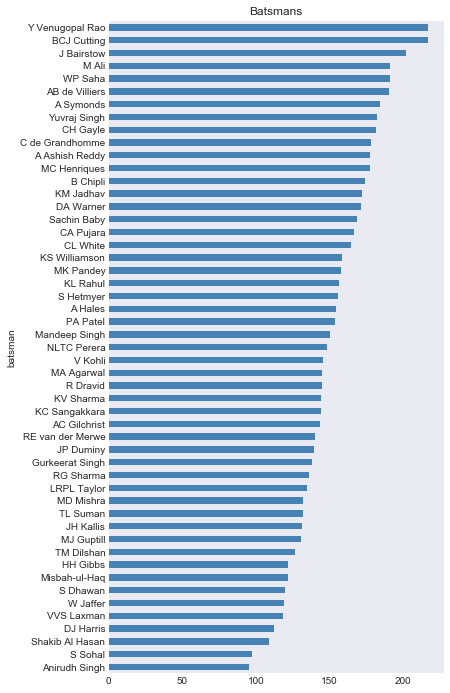

In [55]:
strike_rate['strikerate']=((strike_rate.batsman_runs/strike_rate.ball)*100)
strike_rate.groupby('batsman').mean().strikerate.sort_values(ascending=True).plot.barh(figsize=(6,12),
                                                                                          title='Batsmans',
                                                                                          color='steelblue')

Text(0.5, 1.0, 'Frequency distribution of batsmen according to the Question restraints')

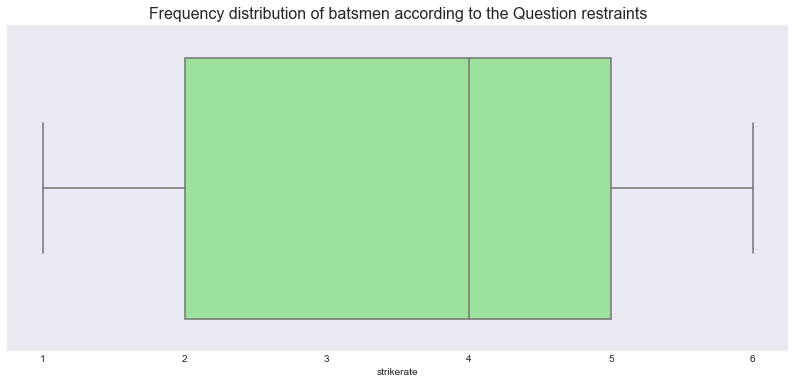

In [56]:
plt.figure(figsize=(14,6))
sns.boxplot(strike_rate.query('strikerate>130').groupby('match_id').count().strikerate,
            color='lightgreen')
plt.title('Frequency distribution of batsmen according to the Question restraints',fontsize=16)

### As we can observe from the above distribution there likely to be 2-5 such batsmen in the match

# Q4

- Calculation elements

In [58]:


noof_boundaries=rcb_srhdeli.query('batsman_runs>=4').groupby(['match_id',
                                                             'batsman',
                                                              ]).batsman_runs.count()

noof_123s=rcb_srhdeli.query('batsman_runs==1 | batsman_runs==2 | batsman_runs==3' ).groupby(['match_id',
                                                                                            'batsman']).batsman_runs.count()

total_runs=rcb_srhdeli.groupby(['match_id',
                    'batsman']).batsman_runs.sum()


In [59]:
q3ratio=(noof_boundaries-noof_123s)/total_runs
print('Top 10 players with the highest ratios are:')
q3ratio.groupby('batsman').mean().sort_values(ascending=False).head(10)

Top 10 players with the highest ratios are:


batsman
B Akhil         0.148148
SN Khan         0.071429
BCJ Cutting     0.020032
P Kumar         0.000000
MJ Guptill      0.000000
S Dube          0.000000
Bipul Sharma    0.000000
DR Smith        0.000000
UT Yadav       -0.011111
J Bairstow     -0.026087
Name: batsman_runs, dtype: float64

### As we can see the the top 10 players aren't included in the options so we are going to choose others

# Q5

In [60]:
total_wickets_powerplay=rcb_srhdeli.query('over<=6').groupby('match_id').player_dismissed.count()
total_wickets_powerplay.describe()

count    25.000000
mean      2.640000
std       1.380821
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: player_dismissed, dtype: float64

Text(0.5, 1.0, 'Total wicket fall distribution')

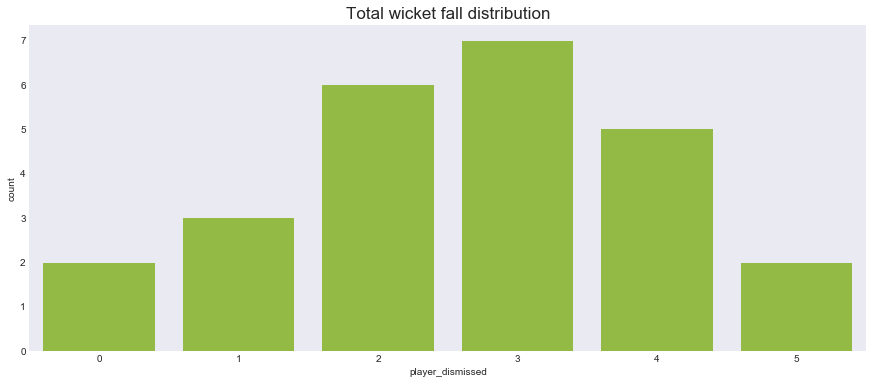

In [64]:
plt.figure(figsize=(15,6))

sns.countplot(total_wickets_powerplay,
             color='yellowgreen')

plt.title('Total wicket fall distribution',fontsize=17)

### As we can observe from the above distribution that there will be around 3-4 fallen wickets in the powerplay